# Clase Supervised Classification ML

## Importar librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from joblib import dump, load


## Importar los datos

In [ ]:
# Tu código aquí debajo
df = pd.read_excel('diabetes_clean.xlsx')
df.sample(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Satisfaction,Job,Outcome
74,4,134,72,0,0,23.8,277.00,60,Extremely satisfied,High School Teacher,1
329,1,112,72,30,176,34.4,528.00,25,Unsatisfied,High School Teacher,0
6,1,140,74,26,180,24.1,828.00,23,Extremely unsatisfied,Human Resources,0
614,5,121,72,23,112,26.2,245.00,30,Extremely satisfied,High School Teacher,0
422,3,87,60,18,0,21.8,444.00,21,Extremely satisfied,Firefighter,0
232,4,96,56,17,49,20.8,0.34,26,Extremely unsatisfied,High School Teacher,0
260,0,124,70,20,0,27.4,254.00,36,Satisfied,Database Administrator,1
80,1,122,90,51,220,49.7,325.00,31,Extremely satisfied,High School Teacher,1


## Detectar y tratar duplicados

In [ ]:
# Tu código aquí debajo
df.duplicated().sum()


0

## Detectar y tratar valores nulos

In [ ]:
# Tu código aquí debajo
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Satisfaction                0
Job                         0
Outcome                     0
dtype: int64

In [ ]:
# Tu código aquí debajo



## Detectar y tratar valores atípicos (ouliers)

In [ ]:
# Tu código aquí debajo
numericas=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

# FUNCIÓN QUE DEVUELVE LOS NÚMEROS DE FILA EN LOS QUE LA VARIABLE EN CUESTIÓN ES OULIER
def outliers(var):
  q1=var.quantile(0.25)
  q3=var.quantile(0.75)
  riq=q3-q1
  sup=q3+1.5*(riq)
  inf=q1-1.5*(riq)
  outl=(var>sup) | (var<inf)
  return outl

for i in df.loc[:,numericas]:
  print("Cantida de oultliers de la variable",i,":",outliers(df[i]).sum())
# Eliminar outliers
# Tu código
for i in df.loc[:,numericas]:
  df=df[~outliers(df[i])]
df.sample(5)

Cantida de oultliers de la variable Pregnancies : 0
Cantida de oultliers de la variable Glucose : 9
Cantida de oultliers de la variable BloodPressure : 4
Cantida de oultliers de la variable SkinThickness : 0
Cantida de oultliers de la variable Insulin : 4
Cantida de oultliers de la variable BMI : 4
Cantida de oultliers de la variable DiabetesPedigreeFunction : 10
Cantida de oultliers de la variable Age : 10


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Satisfaction,Job,Outcome
147,0,119,64,18,92,34.9,725.0,23,Extremely unsatisfied,Firefighter,0
472,8,143,66,0,0,34.9,129.0,41,Extremely satisfied,High School Teacher,1
388,0,84,82,31,125,38.2,233.0,23,Extremely satisfied,Physicians,0
346,1,80,74,11,60,30.0,527.0,22,Extremely unsatisfied,High School Teacher,0
490,3,106,54,23,158,30.9,292.0,24,Satisfied,High School Teacher,0


# Preparamos los datos



## Transformar variables ordinales en numéricas

Como vemos tenemos la variable Satisfaction que es una variable ordinal y podemos suponer que el impacto que podrá tener sobre la variable a predecir (diabetes si/no) permanecerá constante al pasar de una categoría a la siguiente. por eso, la codificaremos como variable ordinal

In [ ]:
# Creamos el objeto que realizará la transformación dándole el orden en una lista con doble corchete
enc=OrdinalEncoder(categories=[['Extremely unsatisfied','Unsatisfied','Satisfied','Extremely satisfied']],dtype='int')
# Particularizamos el codificador en nuestros datos
# Tu código
enc.fit(df[['Satisfaction']])
# Aplicamos el codificador ya particularizado a nuestros datos y lo guardamos machacando la misma variable
# Tu código
df['Satisfaction']=enc.transform(df[['Satisfaction']])
print(df.shape)
df.sample(5)


(576, 11)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Satisfaction,Job,Outcome
171,7,184,84,33,0,35.5,355.0,41,1,Legislator,1
209,3,191,68,15,130,30.9,299.0,34,0,High School Teacher,0
292,6,124,72,0,0,27.6,368.0,29,3,Human Resources,1
48,5,44,62,0,0,25.0,587.0,36,3,High School Teacher,0
39,1,103,80,11,82,19.4,491.0,22,2,Statistician,0


## Transformar variables nominales en numéricas

Como vemos tenemos la variable Job que es una variable nominal (sin orden) y debenmos codificarla mediante el One-Hot encoder

In [ ]:
# Tu código
# Creamos el objeto que realizará la transformación

#Instancio el OneHot
onehot=OneHotEncoder()

# Aplico el OneHot a la columna job y guardo el resultao en a
a=onehot.fit_transform(df[['Job']])

# Convierto el a en data frame y lo llamo encoded_df
encoded_df = pd.DataFrame(a.toarray(), columns=onehot.get_feature_names_out(['Job']))

# Reseteo el índice de los dos data frames antes de concatenarlos
df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# concateno los dos data frames y los guardo machacando el df
df=pd.concat([df,encoded_df],axis=1)

# Elimino la columna Job original antigua, la categórica
df.drop(columns='Job',inplace=True)

# Muestro tamaño yu sample del data frame df transformado
print(df.shape)
df.sample(5)



(576, 20)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Satisfaction,Outcome,Job_Database Administrator,Job_Epidemiologist,Job_Financial Analyst,Job_Firefighter,Job_High School Teacher,Job_Human Resources,Job_Legislator,Job_Market Research Analyst,Job_Physicians,Job_Statistician
546,2,92,52,0,0,30.1,141.0,22,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
233,0,137,68,14,148,24.8,143.0,21,3,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
339,0,120,74,18,63,30.5,285.0,26,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
161,7,184,84,33,0,35.5,355.0,41,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
147,7,159,66,0,0,30.4,383.0,36,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# REGRESIÓN LOGÍSTICA. Usamos la estandarización

## 0. Separar la variable a predecir y las predictoras

In [ ]:
X=df.drop(columns=['Outcome'],inplace=False)
y=df['Outcome']


In [ ]:
# Imprime la dimensión de los datos que vayas creando
# Tu código aquí debajo

print("Tamaño X",X.shape)
print("Tamaño y",y.shape)

Tamaño X (576, 19)
Tamaño y (576,)


## 1. Split. Separar los datos en conjunto de entrenamiento (train) y conjunto de evaluación o test(test)

In [ ]:
# Tu código aquí debajo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# Imprime la dimensión de los datos que vayas creando
# Tu código aquí debajo
print("Tamaño X_train",X_train.shape)
print("Tamaño X_test",X_test.shape)
print("Tamaño y_train",y_train.shape)
print("Tamaño y_test",y_test.shape)


Tamaño X_train (432, 19)
Tamaño X_test (144, 19)
Tamaño y_train (432,)
Tamaño y_test (144,)


## 2. Estandarización controlada.

* Fit en el train
* Transform en el train
* Transform en el test

In [ ]:
# Imprime la dimensión de los datos que vayas creando
# Tu código aquí debajo

from sklearn.preprocessing import StandardScaler
estandarizador = StandardScaler()
estandarizador.fit(X_train)
X_train_std=estandarizador.transform(X_train)
X_test_std=estandarizador.transform(X_test)

In [ ]:
# Imprime la dimensión de los datos que vayas creando
# Tu código aquí debajo
print("Tamaño X_train",X_train.shape)
print("Tamaño X_test",X_test.shape)
print("Tamaño X_train std",X_train_std.shape)
print("Tamaño X_train std",X_test_std.shape)


Tamaño X_train (432, 19)
Tamaño X_test (144, 19)
Tamaño X_train std (432, 19)
Tamaño X_train std (144, 19)


## 3. Fit. Entrenar el modelo

* Creamos el modelo
* Entrenamos el modelo sobre los datos de train y obtenemos el modelo entrenado

In [ ]:
# Cargamos el modelo y lo creamos
# Imprime la dimensión de los datos que vayas creando
# Tu código aquí debajo
# Cargamos el modelo y lo creamos
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
# Ahora LR ya es un modelo que se puede entrenar (fit)

# Ahora LR ya es un modelo que se puede entrenar (fit)

In [ ]:
# Entrenamos el modelo dtree
# Imprime la dimensión de los datos que vayas creando
# Tu código aquí debajo

# Entrenamos el modelo dtree
LR.fit(X_train,y_train)
# Ahora LR es un modelo entrenado capaz de hacer predicciones
# Ahora LR es un modelo entrenado capaz de hacer predicciones

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 4. Evaluar el Modelo

* Hacemos predicciones sobre el conjunto de test
* Comparamos esas predicciones con los valores reales. Calculamos la precisión (accuracy)

In [ ]:
# Hacemos predicciones sobre el conjunto de test y la guardamos en predictions
# Tu código aquí debajo
# Hacemos predicciones sobre el conjunto de test
predictions = LR.predict(X_test)


<Axes: >

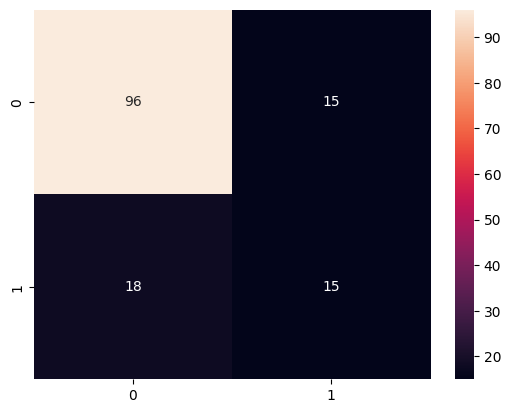

In [ ]:
# Calculamos la matriz de confusión. Si quieres es absoluto y en porcentaje
# Tu código aquí debajo

cm=confusion_matrix(y_test, predictions)
import seaborn as sns
sns.heatmap(cm, annot=True)

Completa esta información a partir de la matriz de confusión:

* Hay ?? Verdaderos positivos
* Hay ?? Falsos negativos
* Hay ?? Falsos positivos
* Hay ?? Verdaderos positivos

Conceptos importantes en modelos supervisados de clasificación

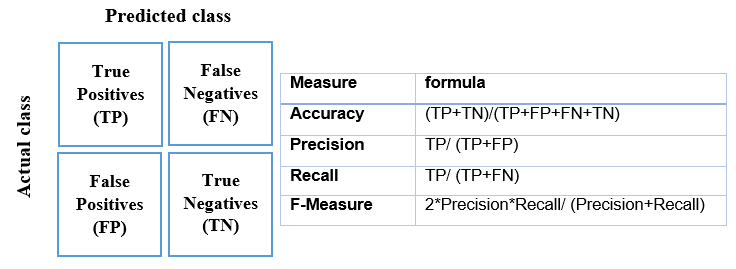

In [ ]:
# Calculamos la Accuracy
# Tu código aquí debajo
print("accuracy",accuracy_score(y_test, predictions))
# Calculamos la Precision
# Tu código aquí debajo
print("precision",precision_score(y_test, predictions))

# Calculamos la Recall /Sensitivity
# Tu código aquí debajo
print("recall/sensitivity",recall_score(y_test, predictions))

# Calculamos la F-Measure
# Tu código aquí debajo
print("F1",f1_score(y_test, predictions))


accuracy 0.7708333333333334
precision 0.5
recall/sensitivity 0.45454545454545453
F1 0.47619047619047616


## 5. Creamos el modelo final

* Creamos una nueva estandarización con todos los datos
* Creamos el modelo con todos los datos
* Guardamos el estandarizador y el modelo

In [ ]:
# Creamos una nueva estandarización con todos los datos
# Tu código aquí debajo
est_final=StandardScaler()

est_final.fit(X)
X_std=est_final.transform(X)

#X_std=est_final.fit_transform(X)

#Creamos /fitamos el modelo con todos los datos
# Tu código aquí debajo
LR_final = LogisticRegression()
LR_final.fit(X_std,y)

LogisticRegression()

In [ ]:
# Guardamos el estandarizador
# Tu código aquí debajo
dump(est_final,'estandarizdor.std')

# Guardamos el ordinal
# Tu código aquí debajo
dump(enc,'ordinal.trf')

# Guardamos el onehot
# Tu código aquí debajo
dump(onehot,'onehot.trf')

# Guardamos el modelo
# Tu código aquí debajo
dump(LR_final,'modelo_LR.md')



['modelo_LR.md']